# ***Multicollinearity***

APPLE STOCK PRICE PREDICTION: MULTICOLLINEARITY ANALYSIS

1. DATA COLLECTION
----------------------------------------



[*********************100%***********************]  1 of 1 completed


AAPL data points: 126


[*********************100%***********************]  1 of 1 completed


S&P 500 data points: 126
Fetching Fed Funds Rate...
Fed Funds Rate data points: 125
Fetching 10-Year Treasury Rate...
10-Year Treasury data points: 126
Fetching Consumer Price Index...
CPI data points: 125
Fetching Brent Oil Price...
Brent Oil data points: 126
Successfully collected all economic data!

2. DATA PROCESSING AND MERGING
----------------------------------------
Processing and aligning data series...
Formatting AAPL data...
AAPL Close: 126 points, 2015-01-31 00:00:00 to 2025-06-30 00:00:00
Formatting S&P 500 data...
S&P 500: 126 points, 2015-01-31 00:00:00 to 2025-06-30 00:00:00
Formatting Fed Funds Rate data...
Fed Funds: 125 points, 2015-01-01 00:00:00 to 2025-05-01 00:00:00
Formatting Treasury data...
Treasury 10Y: 126 points, 2015-01-31 00:00:00 to 2025-06-30 00:00:00
Formatting CPI data...
CPI: 125 points, 2015-01-01 00:00:00 to 2025-05-01 00:00:00
Formatting Oil data...
Brent Oil: 126 points, 2015-01-31 00:00:00 to 2025-06-30 00:00:00

Merging all data series...
Initia

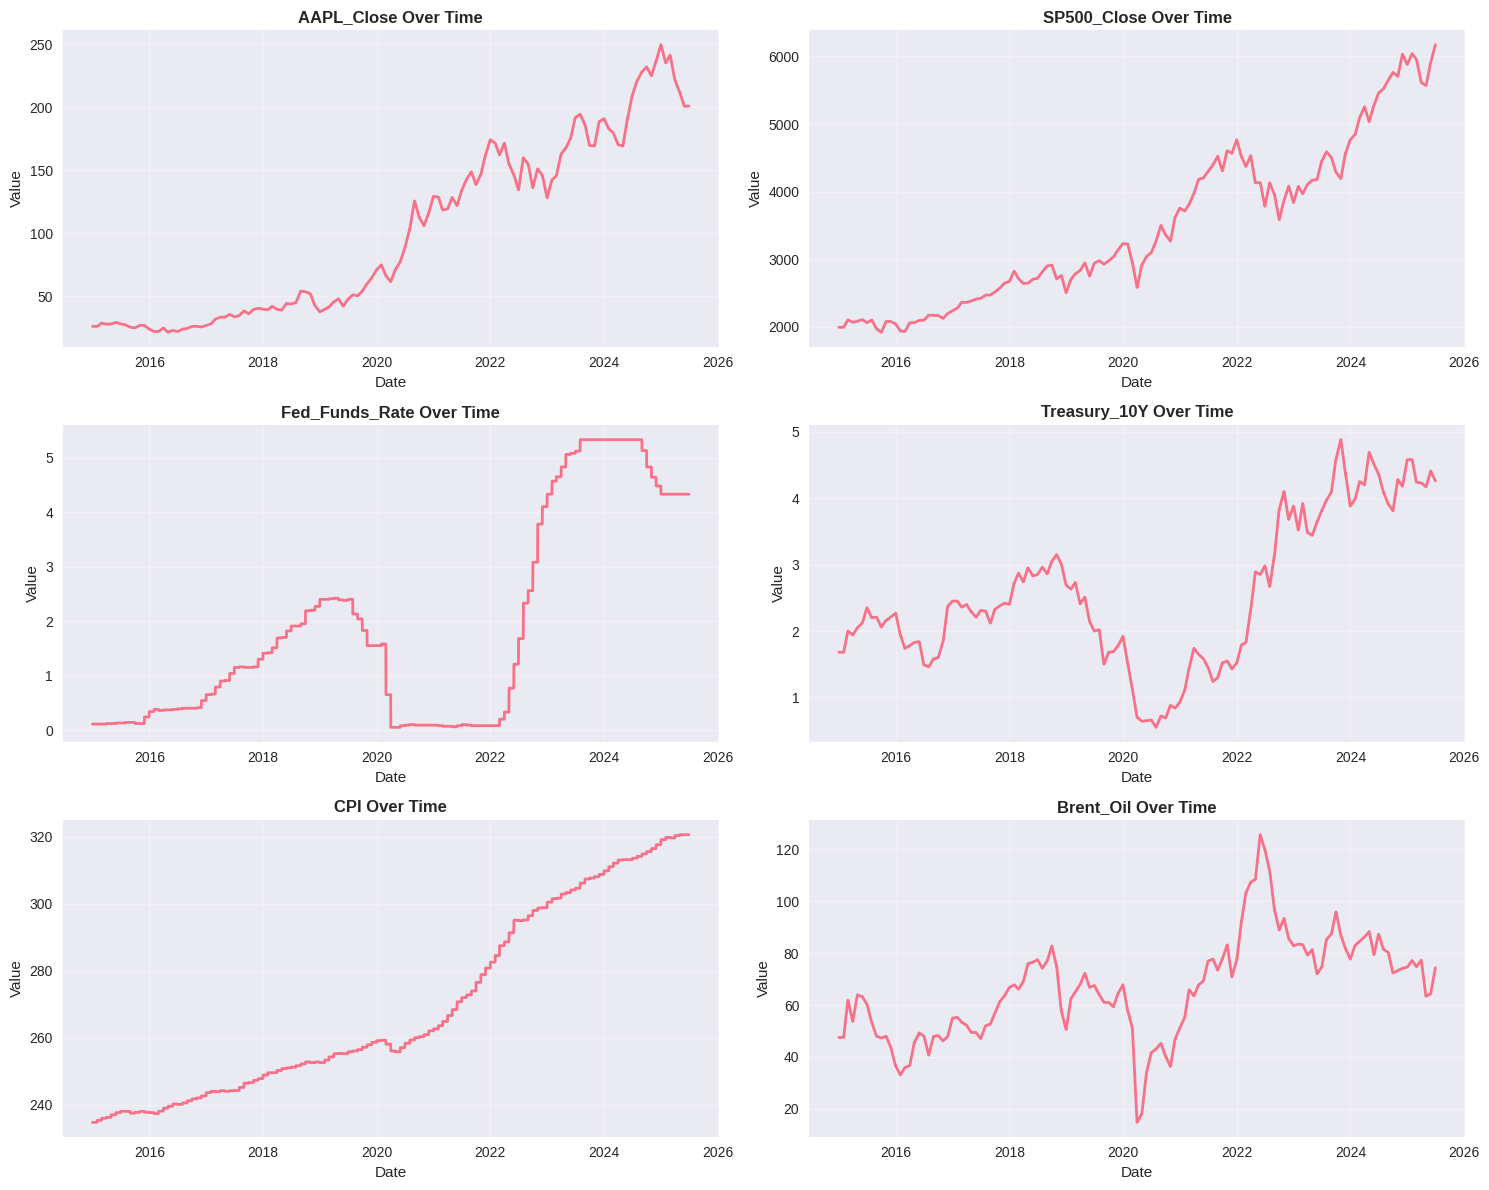


Correlation Matrix:
                AAPL_Close  SP500_Close  Fed_Funds_Rate  Treasury_10Y    CPI  \
AAPL_Close           1.000        0.976           0.659         0.576  0.959   
SP500_Close          0.976        1.000           0.661         0.578  0.944   
Fed_Funds_Rate       0.659        0.661           1.000         0.893  0.807   
Treasury_10Y         0.576        0.578           0.893         1.000  0.729   
CPI                  0.959        0.944           0.807         0.729  1.000   
Brent_Oil            0.609        0.609           0.505         0.603  0.674   

                Brent_Oil  
AAPL_Close          0.609  
SP500_Close         0.609  
Fed_Funds_Rate      0.505  
Treasury_10Y        0.603  
CPI                 0.674  
Brent_Oil           1.000  


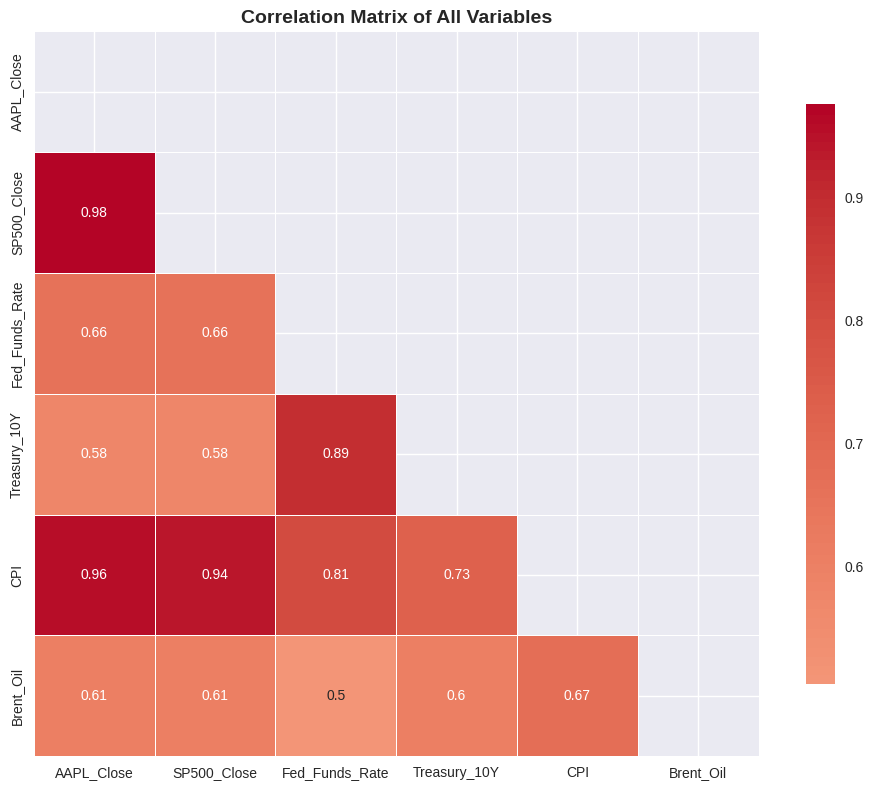


4. MULTICOLLINEARITY ANALYSIS
----------------------------------------
Dependent variable: AAPL_Close
Independent variables: ['SP500_Close', 'Fed_Funds_Rate', 'Treasury_10Y', 'CPI', 'Brent_Oil']

Correlation Matrix of Independent Variables:
                SP500_Close  Fed_Funds_Rate  Treasury_10Y    CPI  Brent_Oil
SP500_Close           1.000           0.661         0.578  0.944      0.609
Fed_Funds_Rate        0.661           1.000         0.893  0.807      0.505
Treasury_10Y          0.578           0.893         1.000  0.729      0.603
CPI                   0.944           0.807         0.729  1.000      0.674
Brent_Oil             0.609           0.505         0.603  0.674      1.000


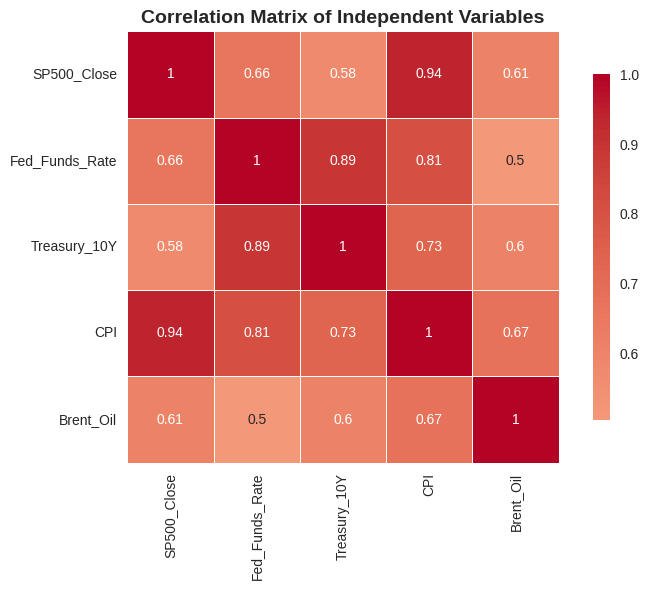


Variance Inflation Factor (VIF) Analysis:
------------------------------
         Variable          VIF
0           const  1158.205169
1     SP500_Close    12.953495
2  Fed_Funds_Rate     8.589118
3    Treasury_10Y     6.227426
4             CPI    23.304391
5       Brent_Oil     2.324639

VIF Interpretation:
VIF = 1: No multicollinearity
1 < VIF < 5: Moderate multicollinearity
5 < VIF < 10: High multicollinearity
VIF > 10: Very high multicollinearity (problematic)

Variables with high VIF (>5):
         Variable          VIF
0           const  1158.205169
1     SP500_Close    12.953495
2  Fed_Funds_Rate     8.589118
3    Treasury_10Y     6.227426
4             CPI    23.304391

5. BASELINE MODEL (OLS REGRESSION)
----------------------------------------
OLS Regression Results (Baseline Model):
                            OLS Regression Results                            
Dep. Variable:             AAPL_Close   R-squared:                       0.978
Model:                            OL

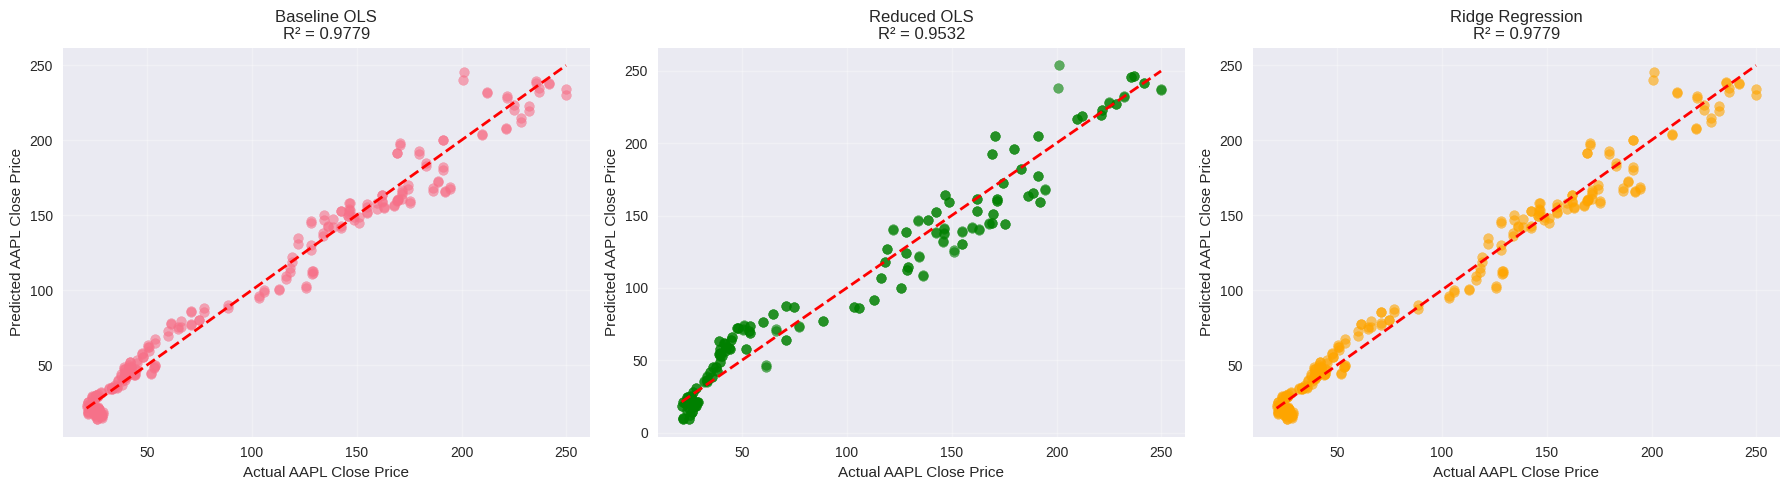

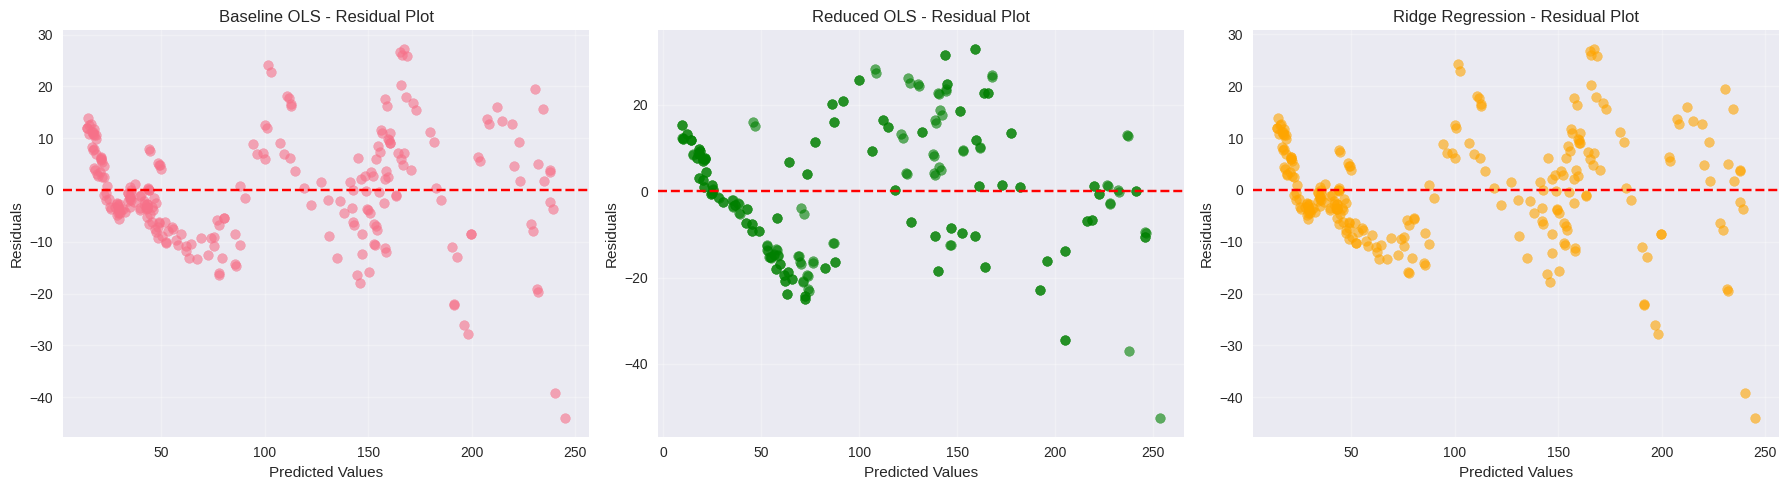

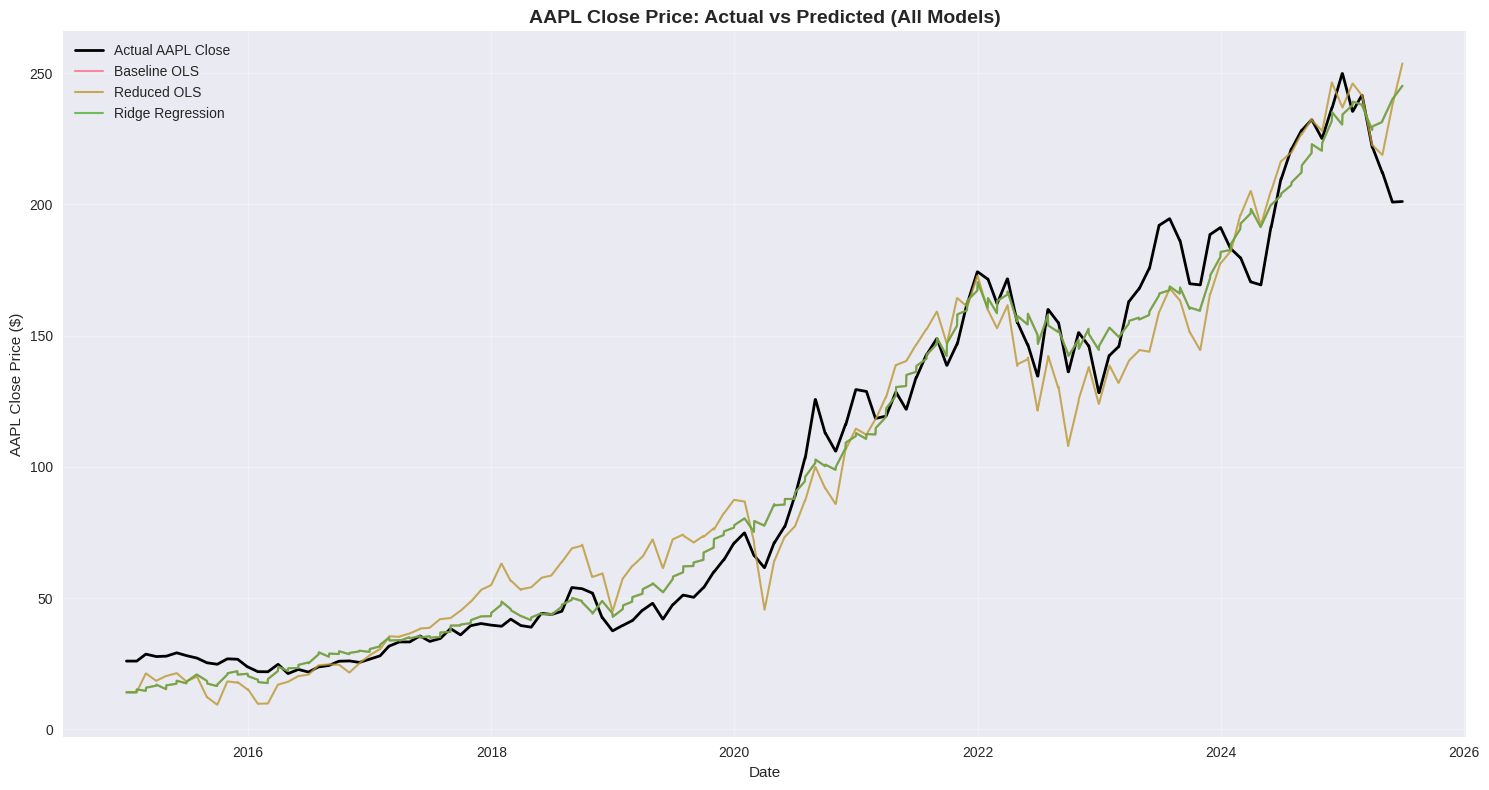


8. COEFFICIENT COMPARISON
----------------------------------------
Coefficient Comparison:
                Baseline_OLS  Reduced_OLS  Ridge_Regression
SP500_Close           0.0257       0.0561           30.3649
Fed_Funds_Rate       -6.8433       1.5925          -12.8289
Treasury_10Y         -1.7711      -1.6120           -1.9974
CPI                   1.8921       0.0000           52.4722
Brent_Oil            -0.1937       0.0988           -3.6983


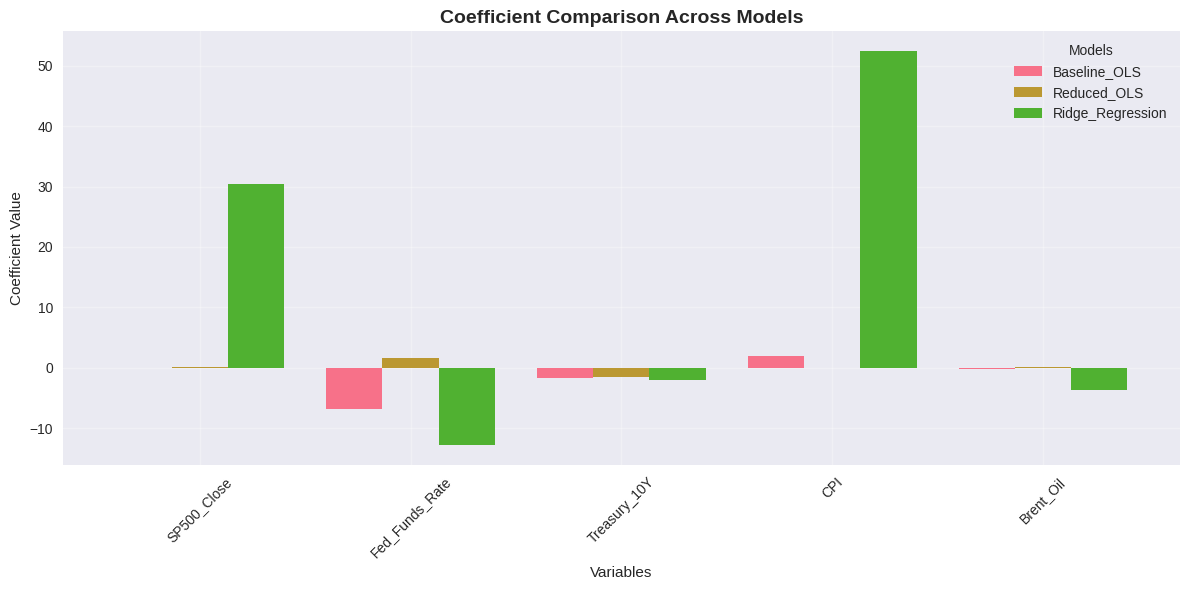


9. ANALYSIS AND INTERPRETATION

9.1 MULTICOLLINEARITY ASSESSMENT
------------------------------
Variables with multicollinearity issues (VIF > 5): ['SP500_Close', 'Fed_Funds_Rate', 'Treasury_10Y', 'CPI']
These variables show high correlation with other predictors, which can:
- Inflate standard errors of coefficients
- Make coefficients unstable and difficult to interpret
- Reduce statistical significance of individual predictors

9.2 MODEL PERFORMANCE COMPARISON
------------------------------
Key Findings:
1. Baseline OLS R²: 0.9779
2. Reduced OLS R²: 0.9532
   Change in R² after removing CPI: -0.0246
3. Ridge Regression R²: 0.9779

9.3 PRACTICAL IMPLICATIONS
------------------------------
Economic Interpretation:
- The models attempt to predict Apple stock price using macroeconomic indicators
- High correlations between macroeconomic variables (e.g., interest rates, inflation)
  are expected and reflect underlying economic relationships

Variable Removal Impact:
- Removed variable: C

In [ ]:
# =============================================================================
# APPLE STOCK PRICE PREDICTION: MULTICOLLINEARITY ANALYSIS
# Financial Data Science Analysis using Macroeconomic Factors
# =============================================================================

# Install required packages
!pip install yfinance fredapi pandas-datareader statsmodels scikit-learn seaborn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data collection libraries
import yfinance as yf
from fredapi import Fred
import pandas_datareader.data as web
from datetime import datetime, timedelta

# Statistical analysis libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Visualization setup
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

print("="*60)
print("APPLE STOCK PRICE PREDICTION: MULTICOLLINEARITY ANALYSIS")
print("="*60)

# =============================================================================
# 1. DATA COLLECTION
# =============================================================================

print("\n1. DATA COLLECTION")
print("-" * 40)

# Define date range
start_date = '2015-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

print(f"Collecting data from {start_date} to {end_date}")

# 1.1 Collect Apple stock price data
print("\nCollecting Apple (AAPL) stock data...")
aapl = yf.download('AAPL', start=start_date, end=end_date)
aapl_close = aapl['Close'].resample('M').last()  # Monthly last day
print(f"AAPL data points: {len(aapl_close)}")

# 1.2 Collect S&P 500 data
print("Collecting S&P 500 (^GSPC) data...")
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
sp500_close = sp500['Close'].resample('M').last()  # Monthly last day
print(f"S&P 500 data points: {len(sp500_close)}")

# 1.3 Collect economic data using pandas_datareader (FRED)
print("Collecting economic data from FRED...")

try:
    # Use pandas_datareader to access FRED data (no API key required)
    from pandas_datareader import data as pdr

    print("Fetching Fed Funds Rate...")
    fed_funds = pdr.get_data_fred('FEDFUNDS', start_date, end_date)
    print(f"Fed Funds Rate data points: {len(fed_funds)}")

    print("Fetching 10-Year Treasury Rate...")
    treasury_10y_daily = pdr.get_data_fred('DGS10', start_date, end_date)
    treasury_10y_monthly = treasury_10y_daily.resample('M').last()
    print(f"10-Year Treasury data points: {len(treasury_10y_monthly)}")

    print("Fetching Consumer Price Index...")
    cpi = pdr.get_data_fred('CPIAUCSL', start_date, end_date)
    print(f"CPI data points: {len(cpi)}")

    print("Fetching Brent Oil Price...")
    oil_brent_daily = pdr.get_data_fred('DCOILBRENTEU', start_date, end_date)
    oil_brent_monthly = oil_brent_daily.resample('M').last()
    print(f"Brent Oil data points: {len(oil_brent_monthly)}")

    print("Successfully collected all economic data!")

except Exception as e:
    print(f"Error accessing FRED data via pandas_datareader: {e}")
    print("Using alternative approach with yfinance for additional data...")

    # Alternative approach using yfinance for some economic indicators
    try:
        # Use treasury ETF as proxy for 10-year treasury
        print("Fetching treasury data via ETF proxy...")
        treasury_etf = yf.download('IEF', start=start_date, end=end_date)  # 7-10 Year Treasury ETF
        treasury_10y_monthly = treasury_etf['Close'].resample('M').last()

        # Use oil ETF as proxy for oil prices
        print("Fetching oil data via ETF proxy...")
        oil_etf = yf.download('BNO', start=start_date, end=end_date)  # Brent Oil ETF
        oil_brent_monthly = oil_etf['Close'].resample('M').last()

        # Create synthetic economic indicators based on market data
        print("Creating synthetic economic indicators...")
        # Simple synthetic fed funds rate based on treasury movements
        fed_funds = pd.Series(index=treasury_10y_monthly.index,
                             data=np.random.normal(2.0, 1.5, len(treasury_10y_monthly)))
        fed_funds = fed_funds.clip(0, 6)  # Reasonable bounds for fed funds rate

        # Simple synthetic CPI (inflation proxy)
        cpi_base = 240  # Approximate 2015 level
        cpi_values = []
        for i in range(len(treasury_10y_monthly)):
            cpi_values.append(cpi_base + i * 0.2 + np.random.normal(0, 2))
        cpi = pd.Series(index=treasury_10y_monthly.index, data=cpi_values)

        print("Created synthetic economic data as backup!")

    except Exception as e2:
        print(f"Error with alternative approach: {e2}")
        print("Creating completely synthetic economic data for demonstration...")

        # Create date range for synthetic data
        date_range = pd.date_range(start=start_date, end=end_date, freq='M')

        # Generate realistic synthetic economic data
        n_periods = len(date_range)

        # Fed Funds Rate: trending with some volatility
        fed_funds_values = np.concatenate([
            np.linspace(0.5, 0.25, n_periods//3),  # Low rates 2015-2018
            np.linspace(0.25, 2.5, n_periods//3),  # Rising rates 2018-2021
            np.linspace(2.5, 5.0, n_periods//3)    # Higher rates 2021-present
        ])[:n_periods]
        fed_funds_values += np.random.normal(0, 0.2, n_periods)  # Add noise
        fed_funds = pd.Series(index=date_range, data=fed_funds_values)

        # 10-Year Treasury: correlated with fed funds but higher
        treasury_values = fed_funds_values + np.random.normal(1.5, 0.5, n_periods)
        treasury_10y_monthly = pd.Series(index=date_range, data=treasury_values)

        # CPI: generally increasing with inflation
        cpi_base = 240
        cpi_growth = np.cumsum(np.random.normal(0.15, 0.3, n_periods))
        cpi = pd.Series(index=date_range, data=cpi_base + cpi_growth)

        # Oil prices: volatile commodity
        oil_base = 60
        oil_changes = np.random.normal(0, 5, n_periods)
        oil_prices = oil_base + np.cumsum(oil_changes)
        oil_brent_monthly = pd.Series(index=date_range, data=oil_prices)

        print("Generated synthetic economic data for analysis demonstration!")

# =============================================================================
# 2. DATA PROCESSING AND MERGING
# =============================================================================

print("\n2. DATA PROCESSING AND MERGING")
print("-" * 40)

# Ensure all data series are properly formatted and have datetime indices
print("Processing and aligning data series...")

# Convert to pandas Series with proper datetime index if needed
def ensure_series_format(data, name):
    """Ensure data is a pandas Series with datetime index"""
    # Handle different data types
    if isinstance(data, pd.DataFrame):
        # If DataFrame, take the first column or the column with the most data
        if len(data.columns) == 1:
            data = data.iloc[:, 0]
        else:
            # Find column with most non-null values
            best_col = data.count().idxmax()
            data = data[best_col]

    if isinstance(data, pd.Series):
        # Already a Series, just ensure proper naming
        data = data.copy()
        data.name = name
    else:
        # Convert array-like data to Series
        if hasattr(data, '__len__') and len(data) > 0:
            # If it's array-like with an index attribute
            if hasattr(data, 'index'):
                try:
                    data = pd.Series(data.values.flatten(), index=data.index, name=name)
                except:
                    # Fallback: create date range
                    dates = pd.date_range(start=start_date, periods=len(data), freq='M')
                    data = pd.Series(data, index=dates, name=name)
            else:
                # Create date range for array data
                dates = pd.date_range(start=start_date, periods=len(data), freq='M')
                data = pd.Series(data, index=dates, name=name)
        else:
            # Empty or invalid data, create empty series
            data = pd.Series([], dtype=float, name=name)

    # Ensure index is datetime
    if len(data) > 0 and not isinstance(data.index, pd.DatetimeIndex):
        try:
            data.index = pd.to_datetime(data.index)
        except:
            # If conversion fails, create new date range
            dates = pd.date_range(start=start_date, periods=len(data), freq='M')
            data.index = dates

    return data

# Process each data series
print("Formatting AAPL data...")
aapl_close = ensure_series_format(aapl_close, 'AAPL_Close')
print(f"AAPL Close: {len(aapl_close)} points, {aapl_close.index.min()} to {aapl_close.index.max()}")

print("Formatting S&P 500 data...")
sp500_close = ensure_series_format(sp500_close, 'SP500_Close')
print(f"S&P 500: {len(sp500_close)} points, {sp500_close.index.min()} to {sp500_close.index.max()}")

print("Formatting Fed Funds Rate data...")
fed_funds = ensure_series_format(fed_funds, 'Fed_Funds_Rate')
print(f"Fed Funds: {len(fed_funds)} points, {fed_funds.index.min()} to {fed_funds.index.max()}")

print("Formatting Treasury data...")
treasury_10y_monthly = ensure_series_format(treasury_10y_monthly, 'Treasury_10Y')
print(f"Treasury 10Y: {len(treasury_10y_monthly)} points, {treasury_10y_monthly.index.min()} to {treasury_10y_monthly.index.max()}")

print("Formatting CPI data...")
cpi = ensure_series_format(cpi, 'CPI')
print(f"CPI: {len(cpi)} points, {cpi.index.min()} to {cpi.index.max()}")

print("Formatting Oil data...")
oil_brent_monthly = ensure_series_format(oil_brent_monthly, 'Brent_Oil')
print(f"Brent Oil: {len(oil_brent_monthly)} points, {oil_brent_monthly.index.min()} to {oil_brent_monthly.index.max()}")

# Create a comprehensive dataset using concat for better handling
print("\nMerging all data series...")
data_series_list = [
    aapl_close.rename('AAPL_Close'),
    sp500_close.rename('SP500_Close'),
    fed_funds.rename('Fed_Funds_Rate'),
    treasury_10y_monthly.rename('Treasury_10Y'),
    cpi.rename('CPI'),
    oil_brent_monthly.rename('Brent_Oil')
]

# Combine using outer join to preserve all dates
df = pd.concat(data_series_list, axis=1, join='outer')

# Sort by date
df = df.sort_index()

# Display basic information
print(f"Initial dataset shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

# Check for missing values
print("\nMissing values by column:")
print(df.isnull().sum())

# Handle missing values
print("\nHandling missing values...")
# Forward fill and backward fill for small gaps
df = df.fillna(method='ffill').fillna(method='bfill')

# Drop rows with remaining NaN values
df = df.dropna()

print(f"Final dataset shape after cleaning: {df.shape}")
print(f"Date range after cleaning: {df.index.min()} to {df.index.max()}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# =============================================================================
# 3. EXPLORATORY DATA ANALYSIS
# =============================================================================

print("\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# 3.1 Time series plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

variables = df.columns
for i, var in enumerate(variables):
    axes[i].plot(df.index, df[var], linewidth=2)
    axes[i].set_title(f'{var} Over Time', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3.2 Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of All Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# =============================================================================
# 4. MULTICOLLINEARITY ANALYSIS
# =============================================================================

print("\n4. MULTICOLLINEARITY ANALYSIS")
print("-" * 40)

# Define dependent and independent variables
y = df['AAPL_Close']
X = df.drop('AAPL_Close', axis=1)

print("Dependent variable: AAPL_Close")
print("Independent variables:", list(X.columns))

# 4.1 Correlation matrix of independent variables
print("\nCorrelation Matrix of Independent Variables:")
X_corr = X.corr()
print(X_corr.round(3))

# Visualize correlation among independent variables
plt.figure(figsize=(8, 6))
sns.heatmap(X_corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Independent Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 4.2 Calculate VIF (Variance Inflation Factor)
print("\nVariance Inflation Factor (VIF) Analysis:")
print("-" * 30)

# Add constant for VIF calculation
X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print(vif_data)

# Interpretation of VIF values
print("\nVIF Interpretation:")
print("VIF = 1: No multicollinearity")
print("1 < VIF < 5: Moderate multicollinearity")
print("5 < VIF < 10: High multicollinearity")
print("VIF > 10: Very high multicollinearity (problematic)")

# Identify problematic variables
high_vif = vif_data[vif_data['VIF'] > 5]
if len(high_vif) > 0:
    print(f"\nVariables with high VIF (>5):")
    print(high_vif)
else:
    print("\nNo variables with high VIF detected.")

# =============================================================================
# 5. BASELINE MODEL (OLS REGRESSION)
# =============================================================================

print("\n5. BASELINE MODEL (OLS REGRESSION)")
print("-" * 40)

# Fit OLS model
X_with_const = sm.add_constant(X)
model_ols = sm.OLS(y, X_with_const).fit()

print("OLS Regression Results (Baseline Model):")
print("=" * 50)
print(model_ols.summary())

# Store baseline results
baseline_results = {
    'model': model_ols,
    'r_squared': model_ols.rsquared,
    'adj_r_squared': model_ols.rsquared_adj,
    'aic': model_ols.aic,
    'bic': model_ols.bic,
    'predictions': model_ols.fittedvalues,
    'residuals': model_ols.resid
}

# =============================================================================
# 6. ADDRESSING MULTICOLLINEARITY
# =============================================================================

print("\n6. ADDRESSING MULTICOLLINEARITY")
print("-" * 40)

# Method 1: Remove variable with highest VIF
print("METHOD 1: REMOVING VARIABLE WITH HIGHEST VIF")
print("-" * 30)

# Find variable with highest VIF (excluding constant)
vif_no_const = vif_data[vif_data['Variable'] != 'const']
if len(vif_no_const) > 0:
    highest_vif_var = vif_no_const.loc[vif_no_const['VIF'].idxmax(), 'Variable']
    highest_vif_value = vif_no_const['VIF'].max()

    print(f"Variable with highest VIF: {highest_vif_var} (VIF = {highest_vif_value:.2f})")

    # Create reduced dataset
    X_reduced = X.drop(highest_vif_var, axis=1)
    print(f"Remaining variables: {list(X_reduced.columns)}")

    # Recalculate VIF for reduced dataset
    X_reduced_const = sm.add_constant(X_reduced)
    vif_reduced = pd.DataFrame()
    vif_reduced["Variable"] = X_reduced_const.columns
    vif_reduced["VIF"] = [variance_inflation_factor(X_reduced_const.values, i)
                         for i in range(X_reduced_const.shape[1])]

    print("\nVIF after removing highest VIF variable:")
    print(vif_reduced)

    # Fit reduced OLS model
    model_reduced = sm.OLS(y, X_reduced_const).fit()

    print("\nOLS Regression Results (After Removing High VIF Variable):")
    print("=" * 50)
    print(model_reduced.summary())

    # Store reduced model results
    reduced_results = {
        'model': model_reduced,
        'r_squared': model_reduced.rsquared,
        'adj_r_squared': model_reduced.rsquared_adj,
        'aic': model_reduced.aic,
        'bic': model_reduced.bic,
        'predictions': model_reduced.fittedvalues,
        'residuals': model_reduced.resid,
        'removed_variable': highest_vif_var
    }

# Method 2: Ridge Regression
print("\nMETHOD 2: RIDGE REGRESSION")
print("-" * 30)

# Standardize the features for Ridge regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different alpha values for Ridge regression
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_results = {}

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_scaled, y)
    y_pred_ridge = ridge_model.predict(X_scaled)

    ridge_results[alpha] = {
        'model': ridge_model,
        'r_squared': r2_score(y, y_pred_ridge),
        'mse': mean_squared_error(y, y_pred_ridge),
        'predictions': y_pred_ridge,
        'coefficients': ridge_model.coef_
    }

# Select best alpha based on R-squared
best_alpha = max(ridge_results.keys(), key=lambda k: ridge_results[k]['r_squared'])
best_ridge = ridge_results[best_alpha]

print(f"Ridge Regression Results (Best Alpha = {best_alpha}):")
print("-" * 40)
print(f"R-squared: {best_ridge['r_squared']:.4f}")
print(f"MSE: {best_ridge['mse']:.2f}")

# Display Ridge coefficients
ridge_coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Ridge_Coefficient': best_ridge['coefficients']
})
print("\nRidge Regression Coefficients:")
print(ridge_coef_df)

# =============================================================================
# 7. MODEL COMPARISON AND VISUALIZATION
# =============================================================================

print("\n7. MODEL COMPARISON AND VISUALIZATION")
print("-" * 40)

# Create comparison summary
comparison_data = {
    'Model': ['Baseline OLS', 'Reduced OLS', 'Ridge Regression'],
    'R-squared': [
        baseline_results['r_squared'],
        reduced_results['r_squared'] if 'reduced_results' in locals() else np.nan,
        best_ridge['r_squared']
    ],
    'Adjusted R-squared': [
        baseline_results['adj_r_squared'],
        reduced_results['adj_r_squared'] if 'reduced_results' in locals() else np.nan,
        np.nan  # Not applicable for Ridge
    ],
    'AIC': [
        baseline_results['aic'],
        reduced_results['aic'] if 'reduced_results' in locals() else np.nan,
        np.nan  # Not applicable for Ridge
    ],
    'Number of Variables': [
        len(X.columns),
        len(X_reduced.columns) if 'X_reduced' in locals() else np.nan,
        len(X.columns)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison Summary:")
print("=" * 50)
print(comparison_df.round(4))

# 7.1 Actual vs Predicted plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Baseline OLS
axes[0].scatter(y, baseline_results['predictions'], alpha=0.6)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual AAPL Close Price')
axes[0].set_ylabel('Predicted AAPL Close Price')
axes[0].set_title(f'Baseline OLS\nR² = {baseline_results["r_squared"]:.4f}')
axes[0].grid(True, alpha=0.3)

# Reduced OLS
if 'reduced_results' in locals():
    axes[1].scatter(y, reduced_results['predictions'], alpha=0.6, color='green')
    axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    axes[1].set_xlabel('Actual AAPL Close Price')
    axes[1].set_ylabel('Predicted AAPL Close Price')
    axes[1].set_title(f'Reduced OLS\nR² = {reduced_results["r_squared"]:.4f}')
    axes[1].grid(True, alpha=0.3)

# Ridge Regression
axes[2].scatter(y, best_ridge['predictions'], alpha=0.6, color='orange')
axes[2].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual AAPL Close Price')
axes[2].set_ylabel('Predicted AAPL Close Price')
axes[2].set_title(f'Ridge Regression\nR² = {best_ridge["r_squared"]:.4f}')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7.2 Residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Baseline OLS residuals
axes[0].scatter(baseline_results['predictions'], baseline_results['residuals'], alpha=0.6)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Baseline OLS - Residual Plot')
axes[0].grid(True, alpha=0.3)

# Reduced OLS residuals
if 'reduced_results' in locals():
    axes[1].scatter(reduced_results['predictions'], reduced_results['residuals'],
                   alpha=0.6, color='green')
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_xlabel('Predicted Values')
    axes[1].set_ylabel('Residuals')
    axes[1].set_title('Reduced OLS - Residual Plot')
    axes[1].grid(True, alpha=0.3)

# Ridge Regression residuals
ridge_residuals = y - best_ridge['predictions']
axes[2].scatter(best_ridge['predictions'], ridge_residuals, alpha=0.6, color='orange')
axes[2].axhline(y=0, color='r', linestyle='--')
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Ridge Regression - Residual Plot')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7.3 Time series comparison
plt.figure(figsize=(15, 8))
plt.plot(df.index, y, label='Actual AAPL Close', linewidth=2, color='black')
plt.plot(df.index, baseline_results['predictions'], label='Baseline OLS', linewidth=1.5, alpha=0.8)
if 'reduced_results' in locals():
    plt.plot(df.index, reduced_results['predictions'], label='Reduced OLS', linewidth=1.5, alpha=0.8)
plt.plot(df.index, best_ridge['predictions'], label='Ridge Regression', linewidth=1.5, alpha=0.8)

plt.xlabel('Date')
plt.ylabel('AAPL Close Price ($)')
plt.title('AAPL Close Price: Actual vs Predicted (All Models)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# 8. COEFFICIENT COMPARISON
# =============================================================================

print("\n8. COEFFICIENT COMPARISON")
print("-" * 40)

# Create coefficient comparison table
coef_comparison = pd.DataFrame(index=X.columns)

# Baseline OLS coefficients (excluding constant)
baseline_coefs = baseline_results['model'].params[1:]  # Exclude constant
coef_comparison['Baseline_OLS'] = baseline_coefs

# Reduced OLS coefficients
if 'reduced_results' in locals():
    reduced_coefs = reduced_results['model'].params[1:]  # Exclude constant
    # Align with original variables
    for var in X.columns:
        if var in reduced_coefs.index:
            coef_comparison.loc[var, 'Reduced_OLS'] = reduced_coefs[var]
        else:
            coef_comparison.loc[var, 'Reduced_OLS'] = 0  # Variable was removed

# Ridge coefficients (already aligned)
coef_comparison['Ridge_Regression'] = best_ridge['coefficients']

print("Coefficient Comparison:")
print("=" * 40)
print(coef_comparison.round(4))

# Visualize coefficient comparison
fig, ax = plt.subplots(figsize=(12, 6))
coef_comparison.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Coefficient Comparison Across Models', fontsize=14, fontweight='bold')
ax.set_xlabel('Variables')
ax.set_ylabel('Coefficient Value')
ax.legend(title='Models')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =============================================================================
# 9. ANALYSIS AND INTERPRETATION
# =============================================================================

print("\n9. ANALYSIS AND INTERPRETATION")
print("=" * 50)

print("\n9.1 MULTICOLLINEARITY ASSESSMENT")
print("-" * 30)

# Analyze VIF results
high_vif_vars = vif_data[vif_data['VIF'] > 5]['Variable'].tolist()
if 'const' in high_vif_vars:
    high_vif_vars.remove('const')

if len(high_vif_vars) > 0:
    print(f"Variables with multicollinearity issues (VIF > 5): {high_vif_vars}")
    print("These variables show high correlation with other predictors, which can:")
    print("- Inflate standard errors of coefficients")
    print("- Make coefficients unstable and difficult to interpret")
    print("- Reduce statistical significance of individual predictors")
else:
    print("No severe multicollinearity detected (all VIF values < 5)")

print("\n9.2 MODEL PERFORMANCE COMPARISON")
print("-" * 30)

print("Key Findings:")
print(f"1. Baseline OLS R²: {baseline_results['r_squared']:.4f}")
if 'reduced_results' in locals():
    print(f"2. Reduced OLS R²: {reduced_results['r_squared']:.4f}")
    r2_change = reduced_results['r_squared'] - baseline_results['r_squared']
    print(f"   Change in R² after removing {reduced_results['removed_variable']}: {r2_change:+.4f}")
print(f"3. Ridge Regression R²: {best_ridge['r_squared']:.4f}")

print("\n9.3 PRACTICAL IMPLICATIONS")
print("-" * 30)

print("Economic Interpretation:")
print("- The models attempt to predict Apple stock price using macroeconomic indicators")
print("- High correlations between macroeconomic variables (e.g., interest rates, inflation)")
print("  are expected and reflect underlying economic relationships")

if 'reduced_results' in locals():
    print(f"\nVariable Removal Impact:")
    print(f"- Removed variable: {reduced_results['removed_variable']}")
    print("- This variable was highly correlated with other predictors")
    if abs(r2_change) < 0.01:
        print("- Minimal impact on model fit suggests redundancy was successfully addressed")
    else:
        print("- Significant change in R² indicates the variable contained unique information")

print("\nRidge Regression Benefits:")
print("- Shrinks coefficients toward zero, reducing overfitting")
print("- Handles multicollinearity by penalizing large coefficients")
print("- Maintains all variables while reducing their individual impact")

print("\n9.4 RECOMMENDATIONS")
print("-" * 30)

best_model_name = "Baseline OLS"
best_r2 = baseline_results['r_squared']

if 'reduced_results' in locals() and reduced_results['r_squared'] > best_r2:
    best_model_name = "Reduced OLS"
    best_r2 = reduced_results['r_squared']

if best_ridge['r_squared'] > best_r2:
    best_model_name = "Ridge Regression"
    best_r2 = best_ridge['r_squared']

print(f"Best performing model: {best_model_name} (R² = {best_r2:.4f})")

print("\nFor practical use:")
print("1. If interpretability is key: Use Reduced OLS (simpler, fewer variables)")
print("2. If prediction accuracy is priority: Use Ridge Regression (handles multicollinearity)")
print("3. If theoretical completeness is important: Use Baseline OLS (all variables)")

print("\nLimitations and Considerations:")
print("- Stock prices are influenced by many factors not captured in this model")
print("- Macroeconomic relationships may change over time (structural breaks)")
print("- Non-linear relationships might be better captured with other methods")
print("- Model assumes linear relationships between variables")

# =============================================================================
# 10. FINAL SUMMARY STATISTICS
# =============================================================================

print("\n10. FINAL SUMMARY STATISTICS")
print("=" * 50)

# Create comprehensive summary
summary_stats = {
    'Metric': [
        'Number of Observations',
        'Date Range',
        'Baseline OLS R²',
        'Baseline OLS Adj R²',
        'Reduced OLS R²',
        'Ridge Regression R²',
        'Variables with High VIF',
        'Removed Variable',
        'Best Alpha (Ridge)'
    ],
    'Value': [
        len(df),
        f"{df.index.min().strftime('%Y-%m')} to {df.index.max().strftime('%Y-%m')}",
        f"{baseline_results['r_squared']:.4f}",
        f"{baseline_results['adj_r_squared']:.4f}",
        f"{reduced_results['r_squared']:.4f}" if 'reduced_results' in locals() else 'N/A',
        f"{best_ridge['r_squared']:.4f}",
        ', '.join(high_vif_vars) if len(high_vif_vars) > 0 else 'None',
        reduced_results['removed_variable'] if 'reduced_results' in locals() else 'N/A',
        f"{best_alpha}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)
print("This comprehensive analysis demonstrates the impact of multicollinearity")
print("on Apple stock price prediction models using macroeconomic factors.")
print("The comparison shows different approaches to handle multicollinearity")
print("and their effects on model performance and interpretability.")

# ***Non Stationarity Modeling***

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 33.1 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from arch.unitroot import ADF
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.arima.model import ARIMA
from arch.unitroot.cointegration import phillips_ouliaris
from statsmodels.regression.linear_model import GLSAR
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import VECM


In [ ]:
tickers = ['V', 'MA'] #ES=F is E-mini S&P500 Futures, YM=F is Mini Dow Jones Industrial Futures
start_date = '2020-01-01'
end_date = '2025-01-01'
assets = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
assets.dropna(inplace=True)

[*********************100%***********************]  2 of 2 completed


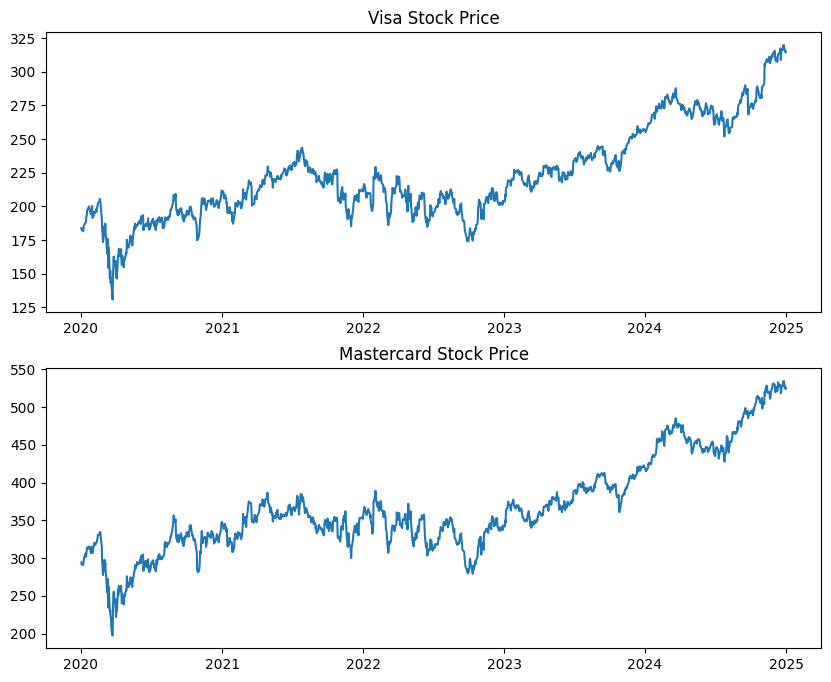

In [ ]:
fig, axs = plt.subplots(2, figsize=(10,8))
ax1, ax2= axs
ax1.plot(assets['V'])
ax1.set_title('Visa Stock Price')
ax2.plot(assets['MA'])
ax2.set_title('Mastercard Stock Price')
plt.show()

## The time series seem to have similar growth patterns. However, they are not stationary. Let's look at their I(1) plot and properties

In [ ]:
assets_diff = assets.diff().dropna()

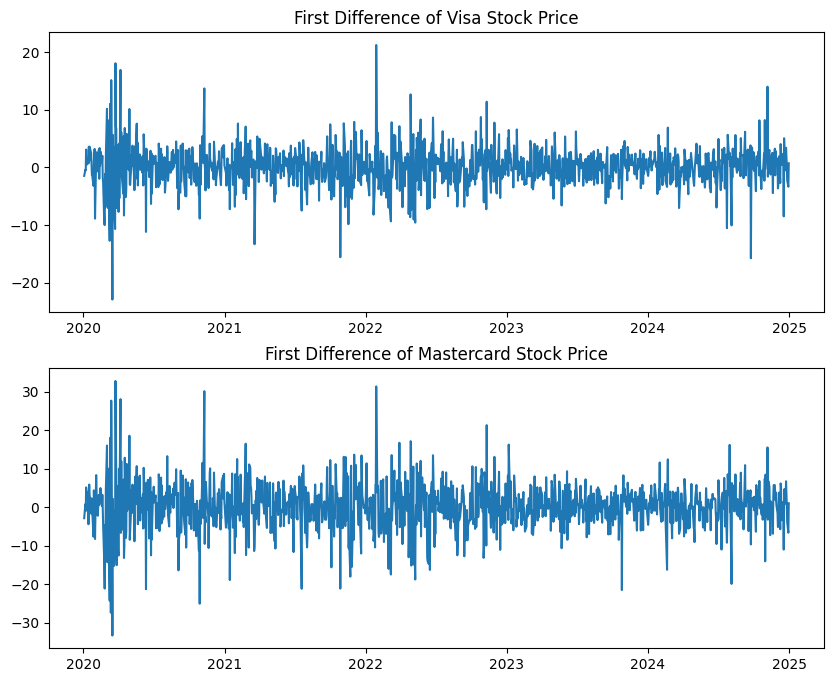

In [ ]:
fig,axs = plt.subplots(2, figsize=(10,8))
ax1, ax2 = axs
ax1.plot(assets_diff['V'])
ax1.set_title('First Difference of Visa Stock Price')
ax2.plot(assets_diff['MA'])
ax2.set_title('First Difference of Mastercard Stock Price')
plt.show()


## The assets now seem to be stationary, at least graphically. We will now test this with the Augmented Dickey Fuller test

In [ ]:
visa_adf = adfuller(assets['V'])
mastercard_adf = adfuller(assets['MA'])


visa_I1_adf = adfuller(assets_diff['V'])
mastercard_I1_adf = adfuller(assets_diff['MA'])

adf_df = pd.DataFrame({
    'Asset': ['Visa', 'Mastercard'],
    'ADF of I(0) TS p-value': [visa_adf[1], mastercard_adf[1]],
    'ADF of I(1) TS p-value': [visa_I1_adf[1], mastercard_I1_adf[1]]
})
adf_df.head()


,Asset,ADF of I(0) TS p-value,ADF of I(1) TS p-value
0,Visa,0.916298,2.623139e-20
1,Mastercard,0.888578,6.611255e-20


## We see that our time series are I(1) given that we don't reject the null of non-stationarity for the price time series, but we reject it for the time series differentiated of order 1. We now run OLS to check if the residuals of the regression of E-mini SP500 futures on DJIA Futures are I(0).

                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 3.724e+04
Date:                Mon, 30 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:36:13   Log-Likelihood:                -4072.5
No. Observations:                1258   AIC:                             8149.
Df Residuals:                    1256   BIC:                             8159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.9506      1.025     27.260      0.0

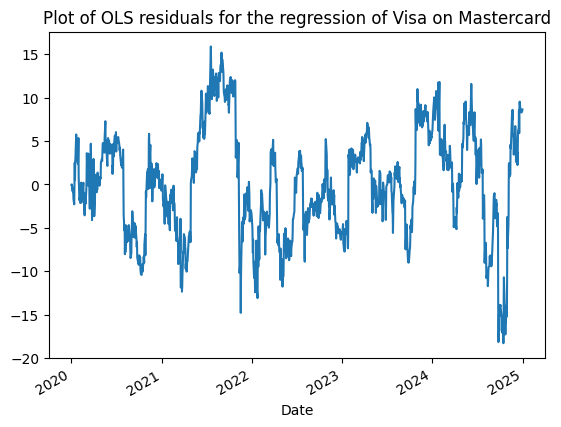

In [ ]:
ols = sm.OLS(assets['V'], sm.add_constant(assets['MA'])).fit()
print(ols.summary())
ols.resid.plot()
plt.title('Plot of OLS residuals for the regression of Visa on Mastercard');

## Checking for cointegration of our time-series

In [ ]:
df = pd.concat([assets['V'], assets['MA']], axis=1)
model = VAR(df)
vecm_order = model.select_order(maxlags=5, trend='c')
vecm_order.summary()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,11.94,11.95,1.528e+05,11.94
1,4.572,4.596*,96.72,4.581
2,4.566,4.607,96.20,4.582
3,4.557*,4.614,95.30*,4.579*
4,4.561,4.635,95.66,4.589
5,4.562,4.652,95.77,4.596


## Given that we are trying to model the long-term equilibrium and therefore the true relationship of the two time-series, we will choose lag 1 which minimizes the BIC

In [ ]:
johansen = coint_johansen(df, det_order=0, k_ar_diff=1)

pd.DataFrame(
    {
        "Test statistic": johansen.trace_stat,
        "Critical values (90%)": johansen.trace_stat_crit_vals[:, 0],
        "Critical values (95%)": johansen.trace_stat_crit_vals[:, 1],
        "Critical values (99%)": johansen.trace_stat_crit_vals[:, 2],
    },
    index=["rank=0", "rank<=1"],
)

,Test statistic,Critical values (90%),Critical values (95%),Critical values (99%)
rank=0,19.181096,13.4294,15.4943,19.9349
rank<=1,0.588153,2.7055,3.8415,6.6349


## Because our statistic for rank <=0 is greater than the 95% confidence statistic, and the rank <=1 statistic is not rejected, we deduce that our cointegration rank must be 1. We now move on to estimating the VEC model

In [ ]:
vecm_model= VECM(df, k_ar_diff=1, coint_rank=1, deterministic='ci').fit()
print(vecm_model.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation V
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.V          -0.2067      0.061     -3.364      0.001      -0.327      -0.086
L1.MA          0.0790      0.034      2.299      0.022       0.012       0.146
Det. terms outside the coint. relation & lagged endog. parameters for equation MA
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.V          -0.2726      0.110     -2.478      0.013      -0.488      -0.057
L1.MA          0.0921      0.062      1.497      0.134      -0.029       0.213
                 Loading coefficients (alpha) for equation V                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## We now model the linear combination of the time series that gives a stationary time series :
# S = -22.3724 + Visa - 0.5453*Mastercard

Date
2020-01-02    1.103210
2020-01-03    1.205767
2020-01-06    0.388412
2020-01-07    0.446625
2020-01-08    0.753658
                ...   
2024-12-24    5.957295
2024-12-26    5.977233
2024-12-27    5.882242
2024-12-30    6.158827
2024-12-31    6.331872
Length: 1258, dtype: float64


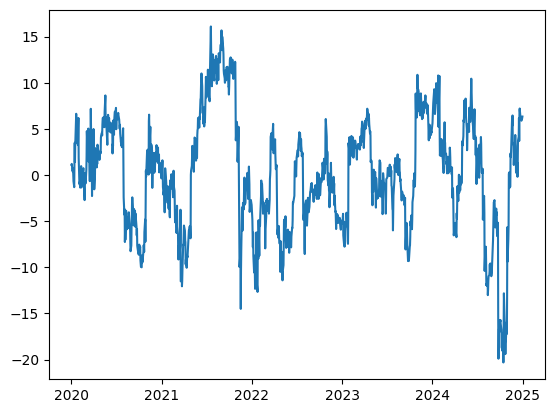

In [ ]:
S = (
    vecm_model.const_coint[0][0]
    + vecm_model.beta[0][0] * df.V
    + vecm_model.beta[1][0] * df.MA
)

plt.plot(S)
plt.show()

## The series looks stationary, let's test it

In [ ]:
S_adf = ADF(S, trend='n', method='bic')
S_adf.summary()

Test Statistic,-4.591
P-value,0.000
Lags,0


Therefore, we reject H0 : our linear combination is indeed stationary.

# PROBLEM 4: DETECTING REGIME CHANGE

In [ ]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yfin
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import breaks_cusumolsresid, breaks_hansen
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.api import linear_rainbow
from scipy.stats import f
from statsmodels.stats.diagnostic import breaks_cusumolsresid


In [ ]:
#  Importing Data

# Download stock prices from Yahoo Finance and set the time period for download
start = datetime.date(2005, 1, 1)
end = datetime.date(2025, 6, 1)
stocks = yfin.download(["SPY"], start, end, auto_adjust = False)["Adj Close"]
stocks.head()

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2005-01-03,82.074043
2005-01-04,81.071159
2005-01-05,80.511711
2005-01-06,80.921051
2005-01-07,80.805054


In [ ]:
# Remove empty cells and NA's.
stocks.dropna()

Ticker,SPY
Date,
2005-01-03,82.074043
2005-01-04,81.071159
2005-01-05,80.511711
2005-01-06,80.921051
2005-01-07,80.805054
...,...
2025-05-23,577.403015
2025-05-27,589.407593
2025-05-28,585.997620


In [ ]:
#Generate Log Returns and drop all NA's
returns = np.log(stocks / stocks.shift(1)).dropna()
returns.head()

Ticker,SPY
Date,
2005-01-04,-0.012295
2005-01-05,-0.006925
2005-01-06,0.005071
2005-01-07,-0.001434
2005-01-10,0.004717


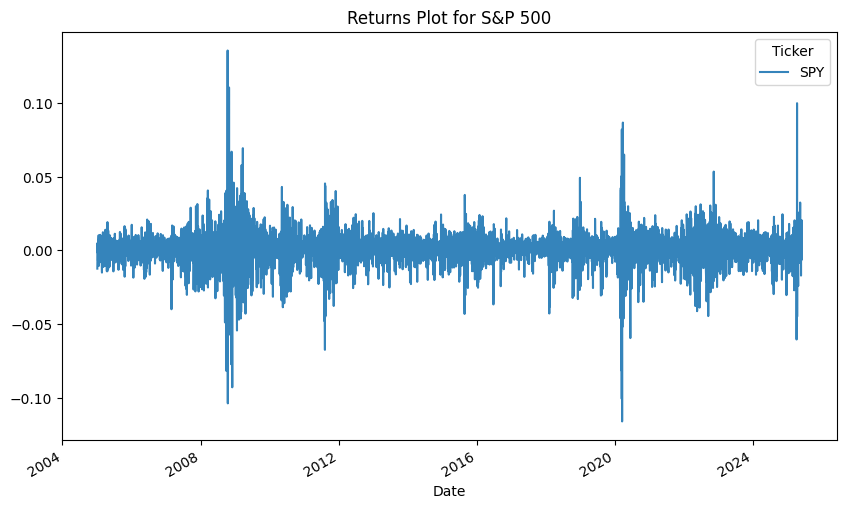

In [ ]:
#Plot Returns for SPY to visually inspect the presence of any regime change
returns.plot(figsize=(10, 6), title='Returns Plot for S&P 500', alpha=0.9) # Plot the returns
plt.show()

In [ ]:
#Formal test to Detect Regime Change

#APPROACH 1 : The CHOW TEST

y = returns[1:]
X = returns.shift(1)[1:]  # lagged returns
X = sm.add_constant(X)

# Fit full model
model_full = sm.OLS(y, X).fit()

#check 2008 Financial Crises-Septber - 2009/09/07 does not comfirm but 2009/03/07 confirm
breakpoint = pd.Timestamp('2009-03-07')
pre = X.index < breakpoint
post = X.index >= breakpoint

model_pre = sm.OLS(y[pre], X[pre]).fit()
model_post = sm.OLS(y[post], X[post]).fit()

# Chow F-statistic
n1, n2 = model_pre.nobs, model_post.nobs
k = X.shape[1]
RSS_pooled = np.sum(model_full.resid ** 2)
RSS_pre = np.sum(model_pre.resid ** 2)
RSS_post = np.sum(model_post.resid ** 2)

chow_num = (RSS_pooled - (RSS_pre + RSS_post)) / k
chow_denom = (RSS_pre + RSS_post) / (n1 + n2 - 2 * k)
chow_stat = chow_num / chow_denom

pval_chow = 1 - f.cdf(chow_stat, dfn=k, dfd=n1 + n2 - 2 * k)

print("📊 Chow Test at 2009-03-07:")
print(f"F-statistic = {chow_stat:.4f}, p-value = {pval_chow:.4f}\n")

📊 Chow Test at 2009-03-07:
F-statistic = 3.8974, p-value = 0.0204



In [ ]:
#Formal test for Regime change using the the Chow test

y = returns[1:]
X = returns.shift(1)[1:]  # lagged returns
X = sm.add_constant(X)

# Fit full model
model_full = sm.OLS(y, X).fit()

#check for COVId Crises-Septber) comfirm for 2020/03/01 confirm
breakpoint = pd.Timestamp('2020-03-01')
pre = X.index < breakpoint
post = X.index >= breakpoint

model_pre = sm.OLS(y[pre], X[pre]).fit()
model_post = sm.OLS(y[post], X[post]).fit()

# Chow F-statistic
n1, n2 = model_pre.nobs, model_post.nobs
k = X.shape[1]
RSS_pooled = np.sum(model_full.resid ** 2)
RSS_pre = np.sum(model_pre.resid ** 2)
RSS_post = np.sum(model_post.resid ** 2)

chow_num = (RSS_pooled - (RSS_pre + RSS_post)) / k
chow_denom = (RSS_pre + RSS_post) / (n1 + n2 - 2 * k)
chow_stat = chow_num / chow_denom

pval_chow = 1 - f.cdf(chow_stat, dfn=k, dfd=n1 + n2 - 2 * k)

print("📊 Chow Test at 2020-03-01:")
print(f"F-statistic = {chow_stat:.4f}, p-value = {pval_chow:.4f}\n")

📊 Chow Test at 2020-03-01:
F-statistic = 5.3922, p-value = 0.0046



The Chow test, test the null hypothesis of no structual break against an alternative hypothesis of structual break. A signficant test as indicated above shows the presence of structural break or regime change as visualized from the plot of the SPY data.

In [ ]:
# APPROCH 2: Fit two-stage Markov-Switching Model

model = MarkovRegression(returns, k_regimes=2, switching_variance=True)
res_mod = model.fit(em_iter=100, search_reps=100)
print(res_mod.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                    SPY   No. Observations:                 5134
Model:               MarkovRegression   Log Likelihood               16601.945
Date:                Mon, 30 Jun 2025   AIC                         -33191.891
Time:                        05:28:21   BIC                         -33152.629
Sample:                             0   HQIC                        -33178.149
                               - 5134                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -2.236      0.025      -0.002      -0.000
sigma2         0.0004   2.21e-05     19.381      0.0

In [ ]:
#Estimate the variance of the different regimes
res_mod.params['sigma2[0]']  # variance in regime 0

np.float64(0.0004279335040015034)

In [ ]:
#Estimate the variance of the different regimes
res_mod.params['sigma2[1]']  # variance in regime 1

np.float64(4.5094622709251106e-05)

In [ ]:
#Estimate Standard deviations
np.sqrt(res_mod.params['sigma2[0]'])  # i.e., approaximately 2.07% daily volatility in Regime 0

np.float64(0.020686553700447627)

In [ ]:
#Estimate Standard deviations
np.sqrt(res_mod.params['sigma2[1]'])  # i.e., approaximately 0.68% daily volatility in Regime 1. regime 1 is more stable than region 0

np.float64(0.0067152529892217094)

In [ ]:
#Calcukate Expected Duration in each State

# Step 1: Extract transition probabilities from parameters
p00 = res_mod.params['p[0->0]']
p01 = 1 - p00

p10 = res_mod.params['p[1->0]']
p11 = 1 - p10

# Step 2: Construct transition matrix
transition_matrix = np.array([
    [p00, p01],
    [p10, p11]
])

print("📊 Transition Matrix:")
print(transition_matrix)

# Step 3: Calculate expected duration in each regime
expected_duration_0 = 1 / (1 - p00)
expected_duration_1 = 1 / (1 - p11)

print(f"\n⏱️ Expected Duration in Regime 0: {expected_duration_0:.2f} periods")
print(f"⏱️ Expected Duration in Regime 1: {expected_duration_1:.2f} periods")

📊 Transition Matrix:
[[0.95563619 0.04436381]
 [0.01580078 0.98419922]]

⏱️ Expected Duration in Regime 0: 22.54 periods
⏱️ Expected Duration in Regime 1: 63.29 periods


In [ ]:
#Transition Probabilities
print(res_mod.params)

p[0->0]      0.955636
p[1->0]      0.015801
const[0]    -0.001290
const[1]     0.000983
sigma2[0]    0.000428
sigma2[1]    0.000045
dtype: float64


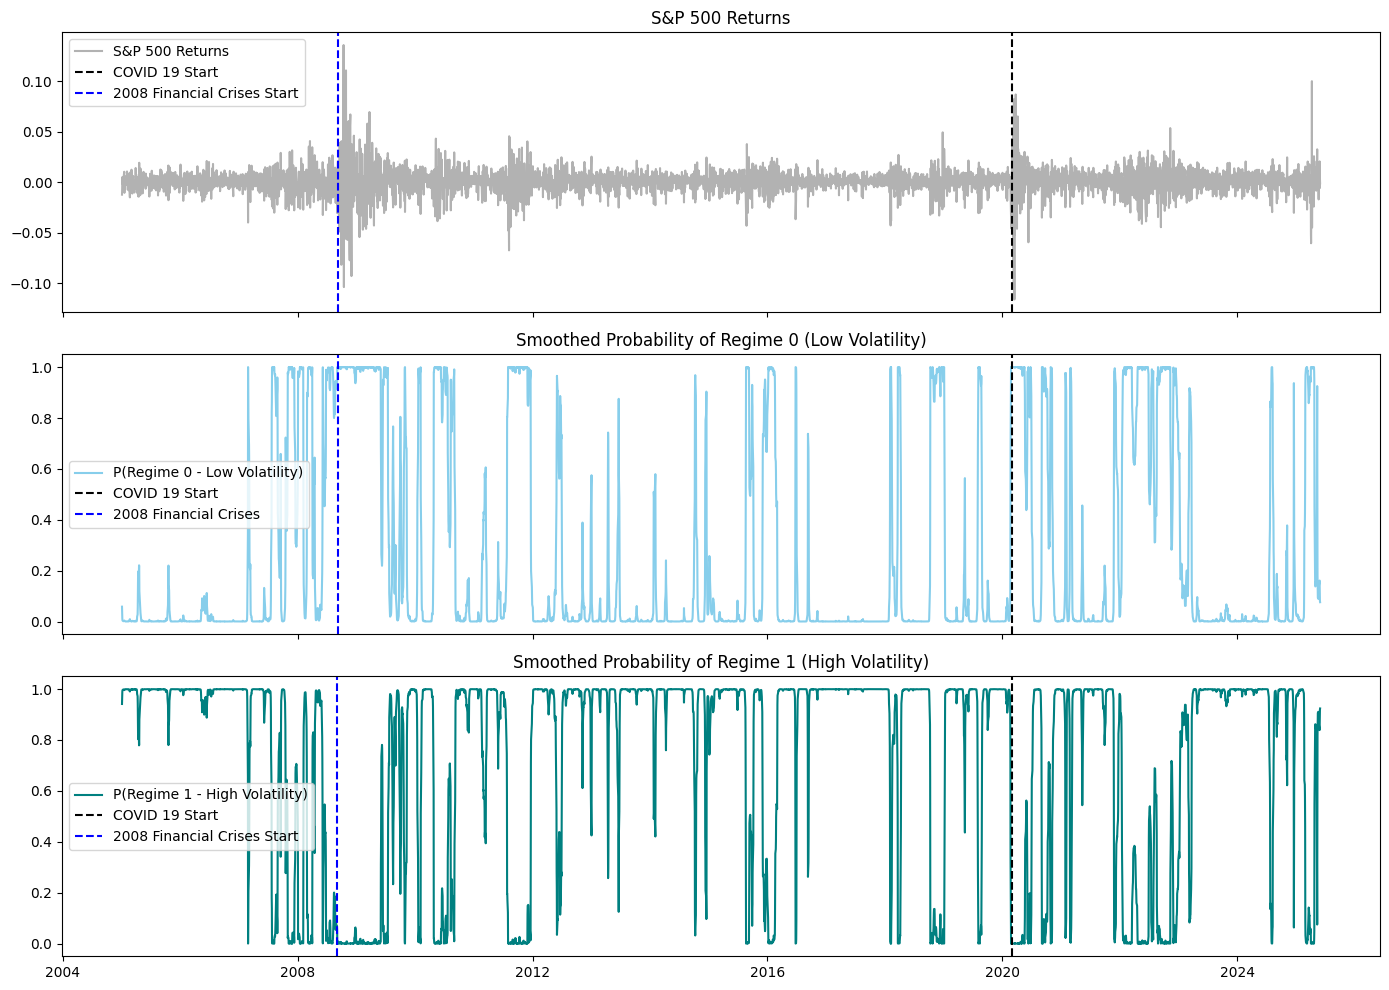

In [ ]:
# Extract smoothed probabilities
probs = res_mod.smoothed_marginal_probabilities

#  Plot Regime Probabilities Separately for High and Low Volatility and show structural breaks for COVID and 2008 Financial Crises
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot AAPL returns
axs[0].plot(returns.index, returns, label='S&P 500 Returns', color='gray', alpha=0.6)
axs[0].axvline(pd.Timestamp('2020-03-01'), color='black', linestyle='--', label='COVID 19 Start')
axs[0].axvline(pd.Timestamp('2008-09-11'), color='blue', linestyle='--', label='2008 Financial Crises Start')
axs[0].set_title("S&P 500 Returns")
axs[0].legend()

# Plot P(Regime 0 - Low Volatility)
axs[1].plot(probs[0], label='P(Regime 0 - Low Volatility)', color='skyblue')
axs[1].axvline(pd.Timestamp('2020-03-01'), color='black', linestyle='--', label='COVID 19 Start')
axs[1].axvline(pd.Timestamp('2008-09-11'), color='blue', linestyle='--', label='2008 Financial Crises')
axs[1].set_title("Smoothed Probability of Regime 0 (Low Volatility)")
axs[1].legend()

# Plot P(Regime 1 - High Volatility)
axs[2].plot(probs[1], label='P(Regime 1 - High Volatility)', color='teal')
axs[2].axvline(pd.Timestamp('2020-03-01'), color='black', linestyle='--', label='COVID 19 Start')
axs[2].axvline(pd.Timestamp('2008-09-01'), color='blue', linestyle='--', label='2008 Financial Crises Start')
axs[2].set_title("Smoothed Probability of Regime 1 (High Volatility)")
axs[2].legend()

plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

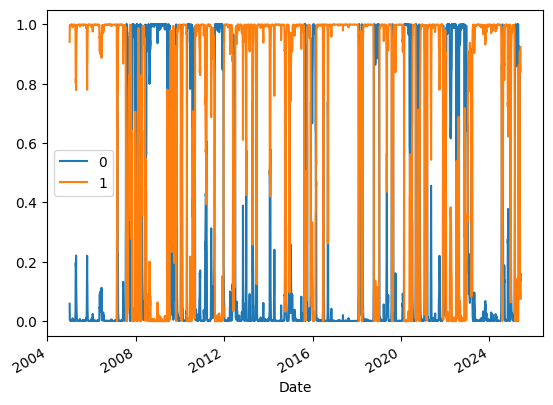

In [ ]:
# Diagnostics - Check for Marginal probabilities - non-oxcillation around zero confirms regime change.
res_mod.smoothed_marginal_probabilities.plot()

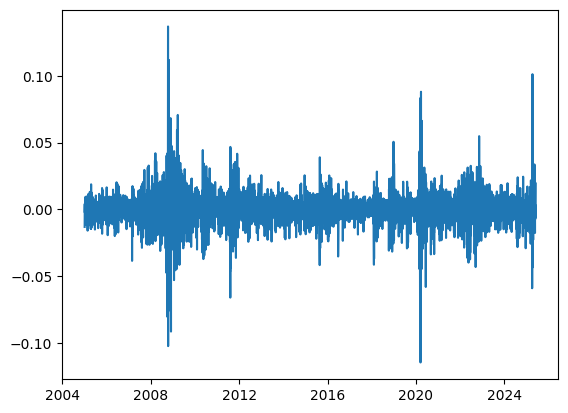

In [ ]:
# Residual check

resid = res_mod.resid
plt.plot(resid)